## Install ultralytics

In [1]:
# Install ultralytics
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 616.7/616.7 kB 20.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.7/61.7 MB 19.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 614.9/614.9 kB 42.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 614.4/614.4 kB 42.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 606.9/606.9 kB 45.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 606.2/606.2 kB 45.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 605.5/605.5 kB 41.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 605.6/605.6 kB 43.0 MB/s eta 0:00:00
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.5.4.60
    Uninstalling opencv-python-4.5.4.60:
      Successfully uninstalled opencv-python-4.5.4.60


In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import random
import os
import cv2
import shutil
import tqdm
import glob
from ultralytics import YOLO

In [3]:
images_path = '/kaggle/input/colorful-fashion-dataset-for-object-detection/colorful_fashion_dataset_for_object_detection/JPEGImages/'
annotations_path  = '/kaggle/input/colorful-fashion-dataset-for-object-detection/colorful_fashion_dataset_for_object_detection/Annotations_txt/'
path = '/kaggle/input/colorful-fashion-dataset-for-object-detection/colorful_fashion_dataset_for_object_detection/'

# Plot Training Data with Annotations

In [4]:
def convert(size,x,y,w,h):
    box = np.zeros(4)
    dw = 1./size[0]
    dh = 1./size[1]
    x = x/dw
    w = w/dw
    y = y/dh
    h = h/dh
    box[0] = x-(w/2.0)
    box[1] = x+(w/2.0)
    box[2] = y-(h/2.0)
    box[3] = y+(h/2.0)

    return (box)

def plot_annotations(img, filename):
    with open(annotations_path+filename, 'r') as f:
        for line in f:
            value = line.split()
            cls = int(value[0])
            x = float(value[1])
            y = float(value[2])
            w = float(value[3])
            h = float(value[4])
            
            img_h, img_w = img.shape[:2]
            bb = convert((img_w, img_h), x,y,w,h)
            cv2.rectangle(img, (int(round(bb[0])),int(round(bb[2]))),(int(round(bb[1])),int(round(bb[3]))),(255,0,0),2)
            plt.axis('off')
            plt.imshow(img)

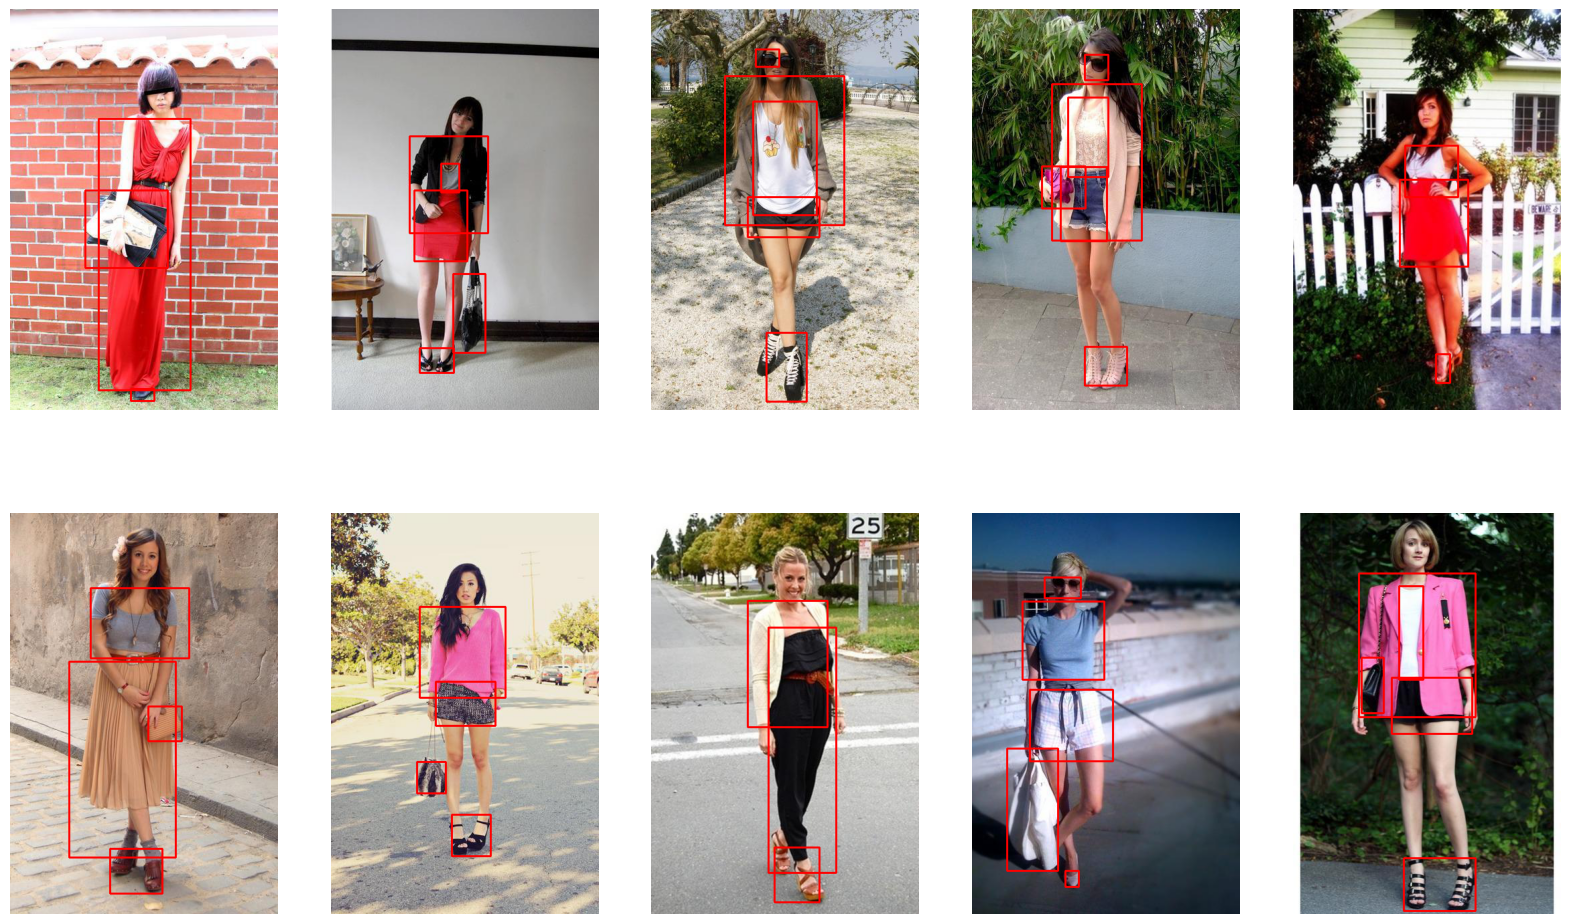

In [5]:
#Plot sample data
plt.figure(figsize=(20,12))
ls = os.listdir(images_path)
c = 1
for i in random.sample(ls, 10):
    img = plt.imread(images_path+i)
    i = i.rstrip('.jpg') + '.txt'
    plt.subplot(2,5, c)
    plot_annotations(img, i)
    c+=1

# Prepare Dataset

In [6]:
train = []
with open(path+'ImageSets/Main/trainval.txt', 'r') as f:
    for line in f.readlines():
        if line[-1]=='\n':
            line = line[:-1]
        train.append(line)

test = []
with open(path+'ImageSets/Main/test.txt', 'r') as f:
    for line in f.readlines():
        if line[-1]=='\n':
            line = line[:-1]
        test.append(line)

In [7]:
len(train), len(test)

(2145, 537)

In [8]:
os.mkdir('train')
os.mkdir('train/images')
os.mkdir('train/labels')

os.mkdir('test')
os.mkdir('test/images')
os.mkdir('test/labels')

In [9]:
train_path = '/kaggle/working/train/'
test_path = '/kaggle/working/test/'

print('Copying Train Data..!!')
for i in tqdm.tqdm(train):
    a = shutil.copyfile(images_path+i+'.jpg', train_path+'images/'+i+'.jpg')
    a = shutil.copyfile(annotations_path+i+'.txt', train_path+'labels/'+i+'.txt')

print('Copying Test Data..!!')
for i in tqdm.tqdm(test):
    a = shutil.copyfile(images_path+i+'.jpg', test_path+'images/'+i+'.jpg')
    a = shutil.copyfile(annotations_path+i+'.txt', test_path+'labels/'+i+'.txt')

Copying Train Data..!!


100%|██████████| 2145/2145 [00:36<00:00, 59.36it/s]


Copying Test Data..!!


100%|██████████| 537/537 [00:08<00:00, 60.62it/s]


# Train Custom Model

In [10]:
text = """
train: /kaggle/working/train
val: /kaggle/working/test

# number of classes
nc: 10

# class names
names: ['sunglass','hat','jacket','shirt','pants','shorts','skirt','dress','bag','shoe']
"""
with open("data.yaml", 'w') as file:
    file.write(text)

In [11]:
model = YOLO("yolov8m.pt")

model.train(data='data.yaml', epochs=5)

  0%|          | 0.00/49.7M [00:00<?, ?B/s]

New https://pypi.org/project/ultralytics/8.0.203 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.145 🚀 Python-3.7.12 torch-1.13.0 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)
WARNING ⚠️ Upgrade to torch>=2.0.0 for deterministic training.
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=data.yaml, epochs=5, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, 

  0%|          | 0.00/755k [00:00<?, ?B/s]

Overriding model.yaml nc=80 with nc=10

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytic

  ········································


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...


  0%|          | 0.00/6.23M [00:00<?, ?B/s]

AMP: checks passed ✅
train: Scanning /kaggle/working/train/labels... 2145 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2145/2145 [00:01<00:00, 1190.10it/s]
train: New cache created: /kaggle/working/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))
val: Scanning /kaggle/working/test/labels... 537 images, 0 backgrounds, 0 corrupt: 100%|██████████| 537/537 [00:00<00:00, 987.01it/s] 
val: New cache created: /kaggle/working/test/labels.cache
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/train
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
        1/5      8.32G       1

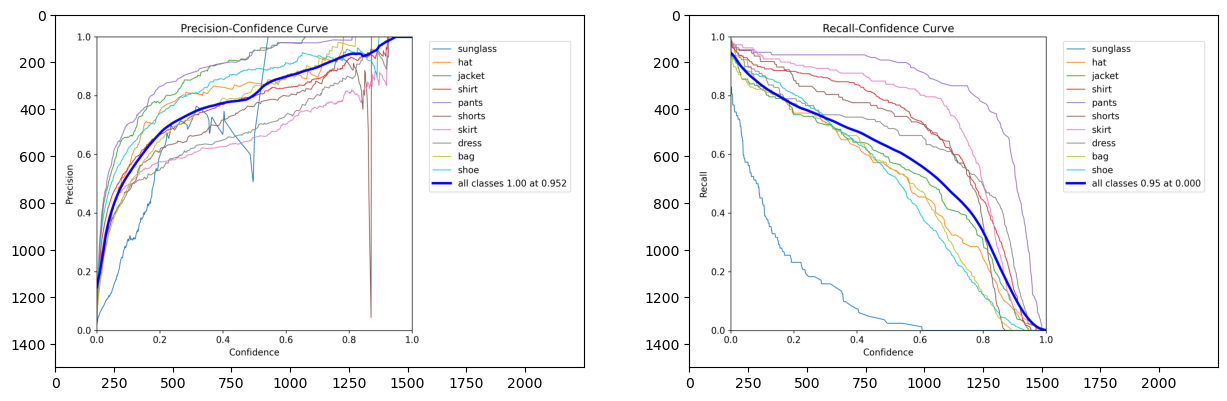

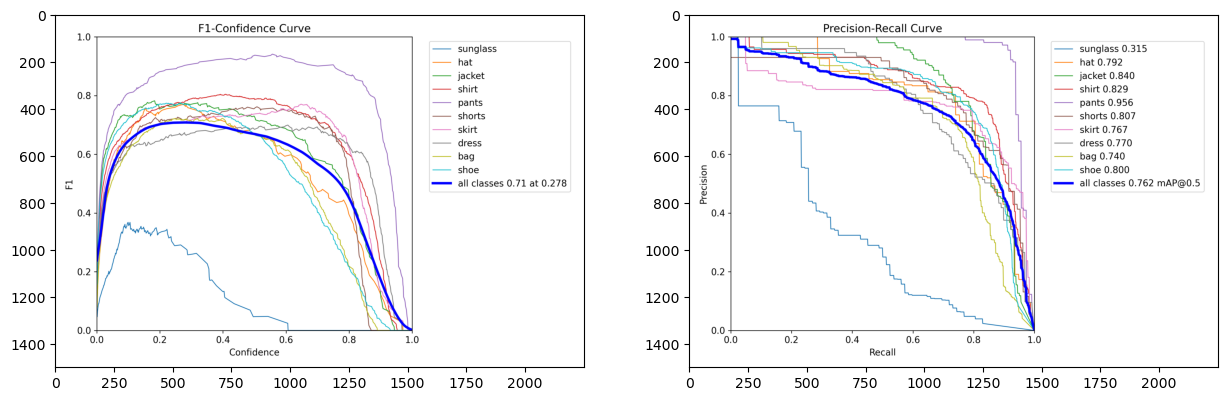

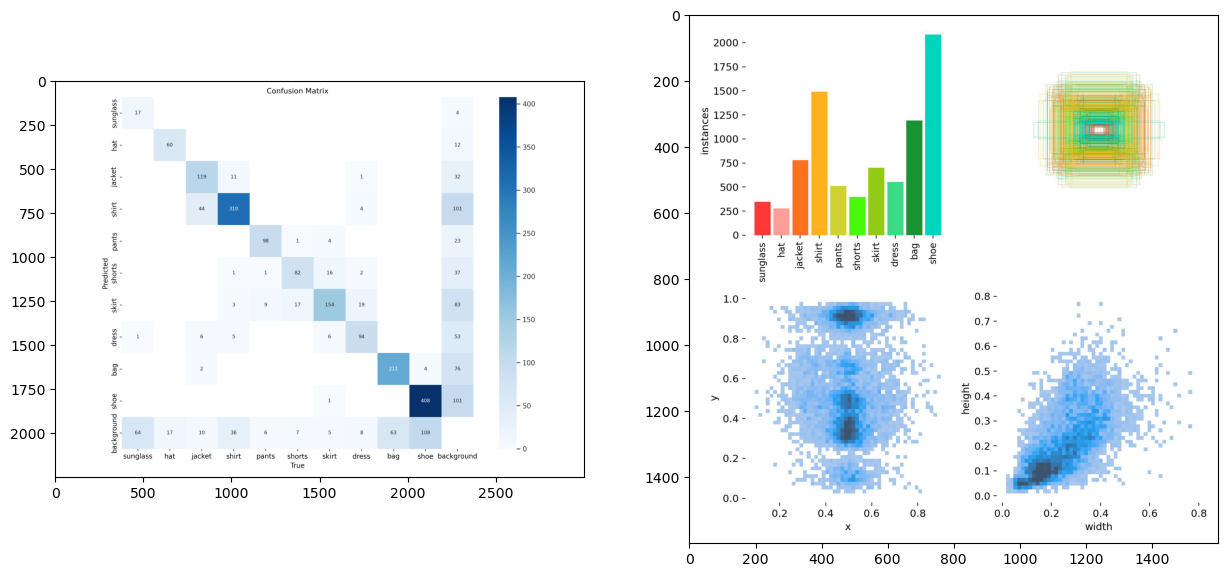

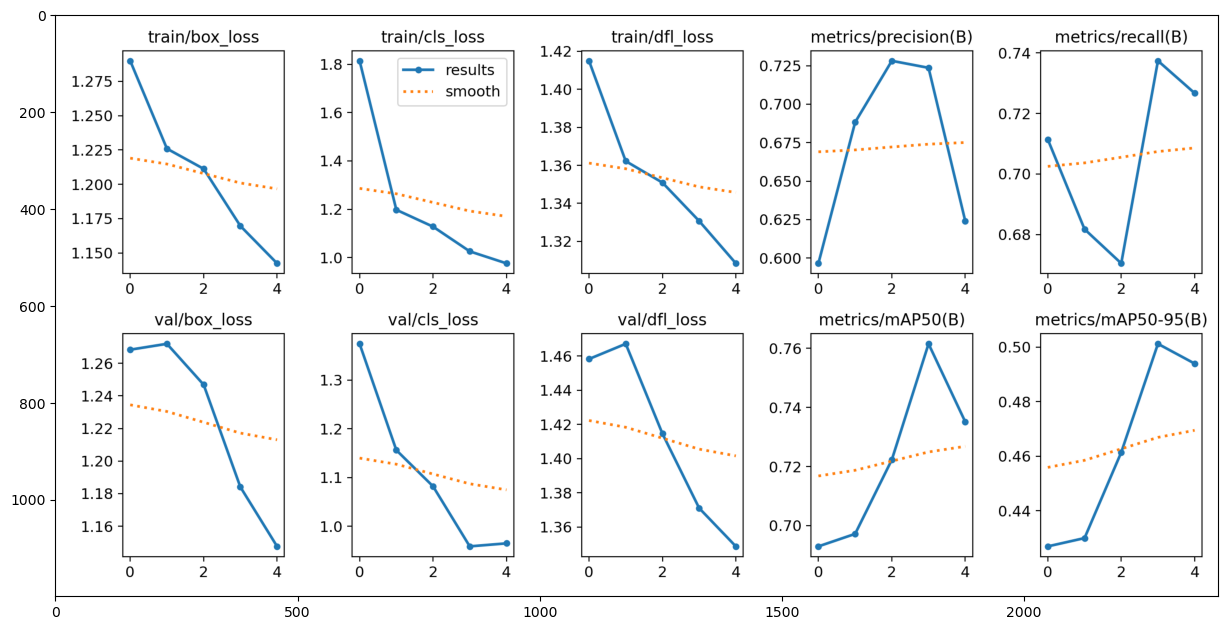

In [12]:
%matplotlib inline
model_path = 'runs/detect/train/'

def plot(ls, size):
    c=1
    plt.figure(figsize=(15,10))
    for im in ls:
        plt.subplot(size[0],size[1],c)
        im = plt.imread(model_path+im)
        plt.imshow(im)
        c+=1
    plt.show()

plot(['P_curve.png','R_curve.png'], (1,2))
plot(['F1_curve.png','PR_curve.png'], (1,2))
plot(['confusion_matrix.png','labels.jpg'], (1,2))
plot(['results.png'],(1,1))

# Test Model

In [13]:
from PIL import Image
from matplotlib.patches import Rectangle
# choose random image from dataset
plt.figure(figsize=(20,20))
# imgs = random.sample(os.listdir(images_path), 1)
imgs = ['25517.jpg']
c = 1

myyolo = YOLO('/kaggle/working/runs/detect/train2/weights/best.pt')

class_name_label = ['sunglass','hat','jacket','shirt','pants','shorts','skirt','dress','bag','shoe']
def random_color():
    return (random.random(), random.random(), random.random())

for img in imgs:
    cur_img_path = images_path+img
    result = myyolo.predict(cur_img_path)
    print("RESULT SIZE: "+ str(len(result[0])))
    print(result[0].boxes)
    boxes = result[0].boxes
    num_of_detected_pieces = len(boxes.cls)
    print(num_of_detected_pieces)
    
    for i in range(num_of_detected_pieces):
        label_index = boxes.cls[i]
        label = class_name_label[int(label_index)]
        print("--------LABEL {}-----".format(label))
        if result[0] is not None:
            current_piece = result[0]
            x1, y1, w, h = boxes.xywh[i]
            x1, y1, w, h = int(x1), int(y1), int(w), int(h)
            
            x_start = round(x1 - (w/2))
            y_start = round(y1 - (h/2))
            x_end = round(x_start + w)
            y_end = round(y_start + h)
            print("{}, {}, {}, {}\n".format(y_start, y_end,x_start,x_end))
            color = random_color()
            plt.gca().add_patch(Rectangle((x_start, y_start), w, h, fill=False, color=color))
            plt.text(x1, y1, f'Class {(label)}', fontsize=12, color='red')

        image = Image.open(cur_img_path)
        plt.imshow(image)
        plt.axis('off')
        plt.show()
    
#     im = plt.imread(images_path+img)
#     plt.subplot(2,3,c)
#     plt.axis('off')
#     plt.imshow(im)

FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/working/runs/detect/train2/weights/best.pt'

<Figure size 2000x2000 with 0 Axes>

In [ ]:
# test how to crop image
import cv2
frame = cv2.imread('/kaggle/input/colorful-fashion-dataset-for-object-detection/colorful_fashion_dataset_for_object_detection/JPEGImages/100073.jpg')
frame = frame[483: 599, 164: 231]  # crop ROI y,x not x, y
rgb_image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_image)
#142, 269, 257, 337
#48, 48, 231, 599
# --------LABEL jacket-----
# # 107, 106, 174, 216
# --------LABEL bag-----
# 84, 328, 82, 151
# --------LABEL shorts-----
# 142, 269, 115, 68
# --------LABEL shoe-----
# 164, 231, 483, 599


In [ ]:
pip install faiss-cpu --no-cache

In [ ]:
folder_path = '/kaggle/input/colorful-fashion-dataset-for-object-detection/colorful_fashion_dataset_for_object_detection/JPEGImages'
files = os.listdir(folder_path)

# Count the number of files in the folder
num_files = len(files)
print(num_files)

In [ ]:
# import faiss                   # make faiss available
# index = faiss.IndexFlatL2(d)  #d dimension
# #add vector to index
# index.add(nb, xb) #xb contains all vector must be indexed, size: nb x d. xb type float32
# D, I = index.search(xq, 10) #searc

In [ ]:
myyolo = YOLO('/kaggle/working/runs/detect/train2/weights/best.pt')
faiss_img_vector_list = []
img_list=[]
def get_crop_clothing_pieces_image(img_path):
    print("get_crop_clothing_pieces_image")
    img = cv2.imread(img_path)
    result = myyolo.predict(img_path)
    boxes = result[0].boxes
    num_of_detected_pieces = len(boxes.cls)    
    for i in range(num_of_detected_pieces):
        label_index = boxes.cls[i]
        label = class_name_label[int(label_index)]

        if result[0] is not None:
            current_piece = result[0]
            x1, y1, w, h = boxes.xywh[i]
            x1, y1, w, h = int(x1), int(y1), int(w), int(h)
            x_start = round(x1 - (w/2))
            y_start = round(y1 - (h/2))
            x_end = round(x_start + w)
            y_end = round(y_start + h)
            cur_img = img[y_start:y_end, x_start:x_end]
            cur_img = cv2.resize(cur_img,(100,100),interpolation=cv2.INTER_AREA)
            cur_img = cv2.cvtColor(cur_img,cv2.COLOR_BGR2RGB)
            img_list.append(cur_img)
            #convert to float32 and normalize it by /255
            float32_img = np.array(cur_img).astype(np.float32) / 255.0
            faiss_img_vector_list.append(float32_img)
            #faiss_img_vector = np.append(faiss_img_vector, float32_img)

def images_in_folder_to_faiss_input():
    print("images_in_folder_to_faiss_input")
    img_path = '/kaggle/input/colorful-fashion-dataset-for-object-detection/colorful_fashion_dataset_for_object_detection/JPEGImages'
    cnt = 0
    for filename in os.listdir(folder_path):
        cnt+=1
        if (cnt > 50):
            break
        img_path = os.path.join(folder_path, filename)
        get_crop_clothing_pieces_image(img_path)
    print("DONE")
    

images_in_folder_to_faiss_input()

In [ ]:
faiss_img_vector = np.array(faiss_img_vector_list, dtype=np.float32)
# print(faiss_img_vector)
print(faiss_img_vector.shape)

In [ ]:
pip install faiss-cpu --no-cache

In [ ]:
import faiss                   # make faiss available
# index = faiss.IndexFlatL2(1024)  #d dimension
# # #add vector to index
# index.add(faiss_img_vector) #xb contains all vector must be indexed, size: nb x d. xb type float32
# D, I = index.search(list_of_pieces[0], 10) #searc
flattened_images = faiss_img_vector.reshape(faiss_img_vector.shape[0], -1)

# Then, create the Faiss index
index = faiss.IndexFlatL2(flattened_images.shape[1])

# Add the flattened vectors to the index
index.add(flattened_images)



In [ ]:
import pickle

chunk = faiss.serialize_index(index)
np.save("index.npy", chunk)
#index3 = faiss.deserialize_index(np.load("index.npy"))   # identical to index

with open("faiss.pkl", "wb") as f:
    pickle.dump(chunk, f)

In [ ]:
query_vector = np.array([faiss_img_vector_list[0]], dtype=np.float32)
print(query_vector.shape)
flattened_query_vector = query_vector.reshape(query_vector.shape[0], -1)
#flattened_query_vector = flattened_query_vector.shape[1]

k = 10
with open("faiss.pkl", "rb") as f:
    FAISS_INDEX = faiss.deserialize_index(pickle.load(f))
D, I = FAISS_INDEX.search(flattened_query_vector, k)
print(I)

In [ ]:
# !zip -r file.zip /kaggle/working/faiss.pkl
# from IPython.display import FileLink
# FileLink(r'file.zip')